In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot , plot
from plotly.subplots import make_subplots

In [13]:
df = pd.read_csv('E:/laptop_price.csv', encoding='latin-1')

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# here by using Shape method we get the rows and coloumn of the data frame

In [16]:
df.shape

(1303, 13)

# here were going to look for the data type of value given in DataFrame

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


# removing Duplicate values and replacing 0 with Null
## cleaning the data

In [23]:
df = df.drop_duplicates()
df = df.fillna(0)

In [25]:
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# replacing those objects to intigers by replace chareter with nothing and setting the data type 

In [27]:
df["Ram"]=df["Ram"].str.replace("GB","")

In [29]:
df["Weight"]=df["Weight"].str.replace("kg","")

In [31]:
df["Ram"]=df["Ram"].astype("int32")
df["Weight"]=df["Weight"].astype("float32")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int32  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float32
 12  Price_euros       1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), int64(1), object(8)
memory usage: 122.3+ KB


# we have the price in Eruros now we gona convert it to indian rupees 

In [39]:
conversion_rate = 90
df['Price_rupees'] = df['Price_euros'] * conversion_rate


In [41]:
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_rupees
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,120572.1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,80904.6
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,51750.0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,228370.5
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,162324.0


In [51]:
df.drop(columns=['Price_euros'], inplace=True)

KeyError: "['Price_euros'] not found in axis"

In [48]:
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_rupees
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,120572.1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,80904.6
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51750.0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,228370.5
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,162324.0


# we remvoing the laptopId col becasue we dont need that thing to show in histograph

In [52]:
df.drop(columns=["laptop_ID"],inplace=True)

KeyError: "['laptop_ID'] not found in axis"

# history graph of all that are in integer by using pandas hist method

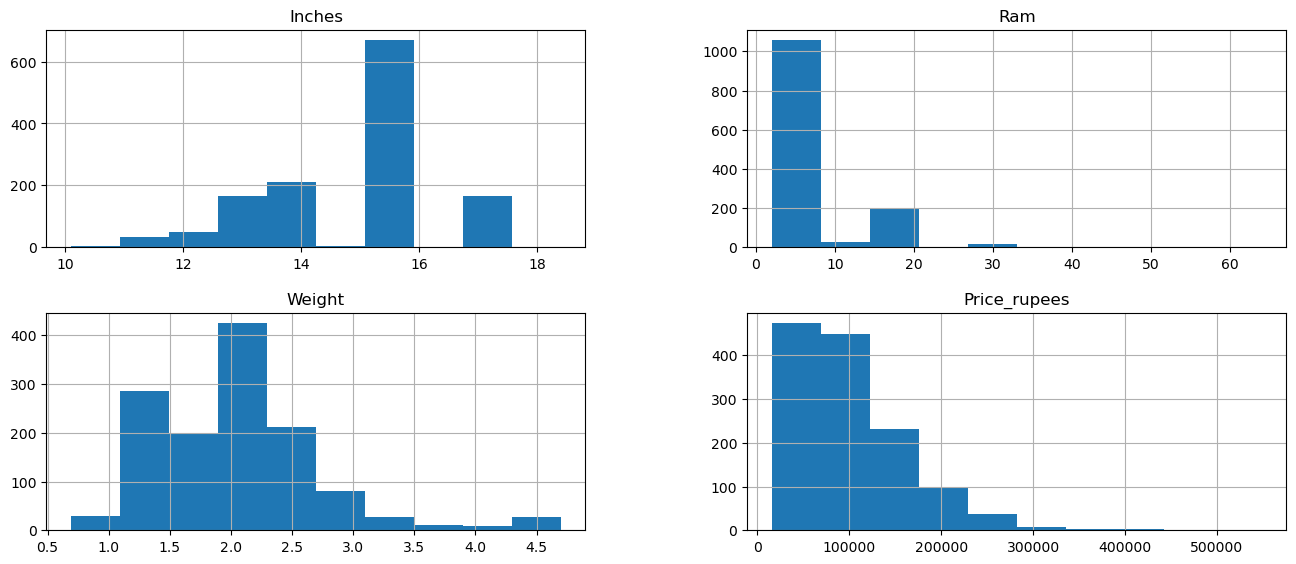

In [53]:
df.hist(figsize=(16,6.5));

# Showing the HIstogram of the price Using the seaborn method displot

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


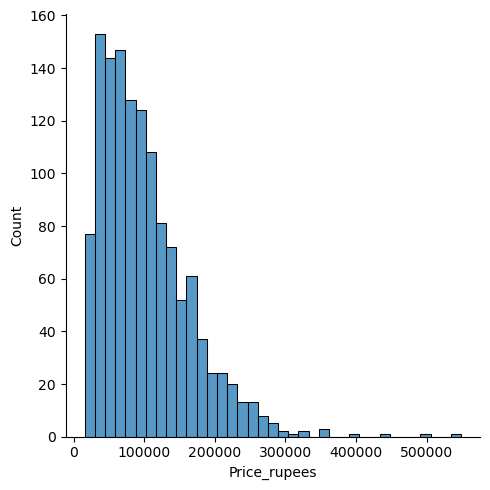

In [56]:
sns.displot(df["Price_rupees"])
plt.show()

## this graph show that the laptops under one lakh sold in Big counts between  160 to 150 units

## This Graph represent the brands that laptops are most sold 

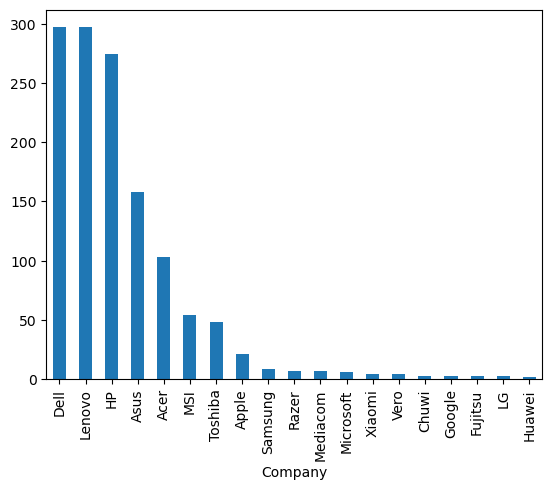

In [57]:
df["Company"].value_counts().plot(kind='bar')
plt.show()

here in the above grph show that dell is the laptop sold 

## showing the graph that what company sold in heighest price 


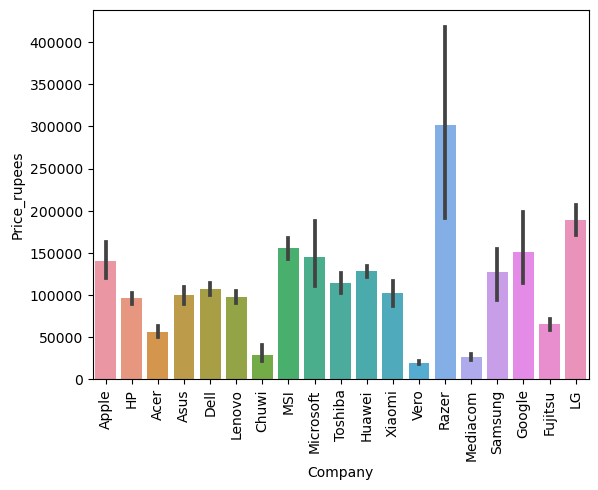

In [61]:
sns.barplot(x=df["Company"],y=df["Price_rupees"])
plt.xticks(rotation="vertical")
plt.show()

## this graph shows the whats the most categoried laptop sold 

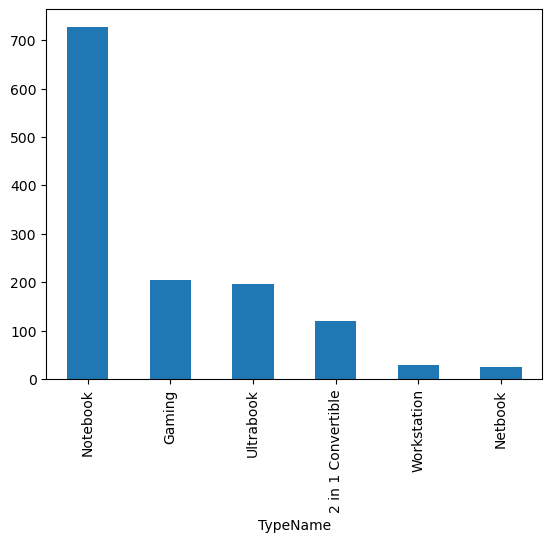

In [63]:
df["TypeName"].value_counts().plot(kind="bar")
plt.show()

## this shows the workstation is sold at higher price Followed by gaming category

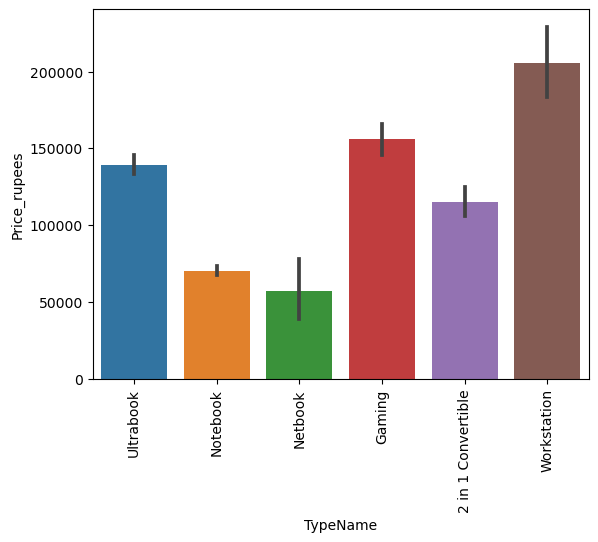

In [66]:
sns.barplot(x=df["TypeName"],y=df["Price_rupees"])
plt.xticks(rotation="vertical")
plt.show()

## this scater graph from seaborn method shows that 17inch screen are the one sold in higher price

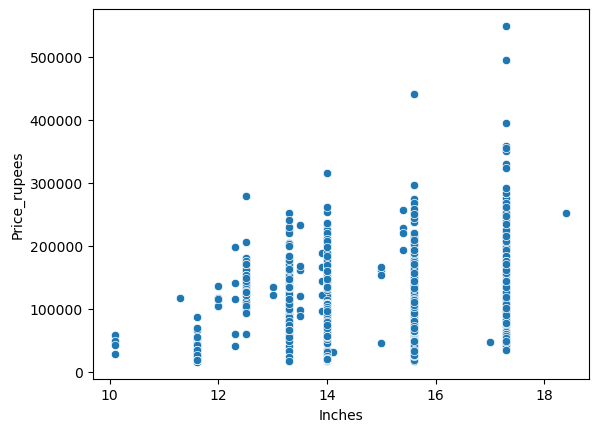

In [68]:
sns.scatterplot(x=df["Inches"],y=df["Price_rupees"],data=df);

## getting the data What Graphics cards are most used 

In [70]:
df.Gpu.value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

# after analyzing the GPU data we are creating a new coloumn called GPU Name where its show that gpu company

In [72]:
df["GPU Name"]=df["Gpu"].apply(lambda x: " ".join(x.split()[0:3]))
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_rupees,GPU Name
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,120572.1,Intel Iris Plus
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,80904.6,Intel HD Graphics
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51750.0,Intel HD Graphics
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,228370.5,AMD Radeon Pro
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,162324.0,Intel Iris Plus


# here we check for the GPU are from Intel ,if not we return as others GPU

In [75]:
def featch_processor(text):
    if text =="Intel Core i7" or text =="Intel Core i5" or text =="Intel Core i3":
        return text
    else:
        if text.split()[0]=="Intel":
            return 'Other Intel GPU'
        else:
            return 'AMD GPU'

In [77]:
df["GPU brand"]=df["GPU Name"].apply(featch_processor)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_rupees,GPU Name,GPU brand
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,120572.1,Intel Iris Plus,Other Intel GPU
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,80904.6,Intel HD Graphics,Other Intel GPU
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51750.0,Intel HD Graphics,Other Intel GPU
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,228370.5,AMD Radeon Pro,AMD GPU
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,162324.0,Intel Iris Plus,Other Intel GPU


## plotting graph what GPU brand sold in high

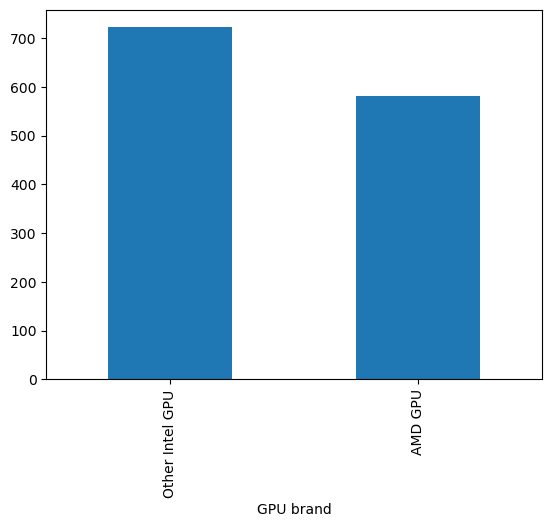

In [79]:
df["GPU brand"].value_counts().plot(kind='bar');

## ploting graph that what is the RAM size for  there price

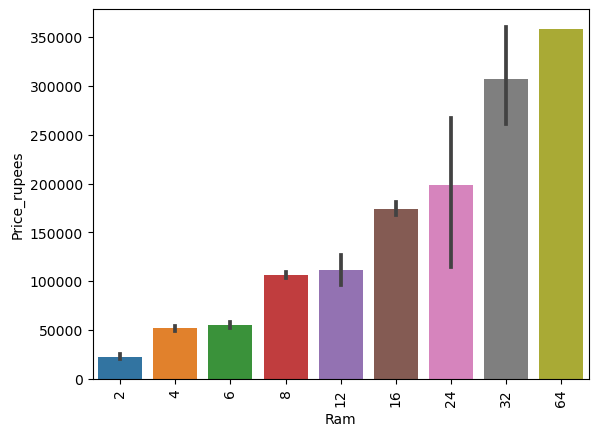

In [81]:
sns.barplot(x=df["Ram"],y=df["Price_rupees"])
plt.xticks(rotation='vertical')
plt.show()

## PLoting the Graph that to know the most installed os 

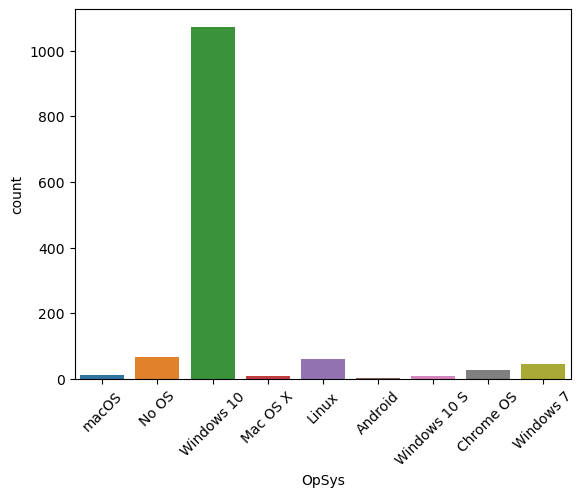

In [85]:
sns.countplot(x="OpSys", data=df)
plt.xticks(rotation=45)
plt.show()

## after the most installed OS we need to know what OS laptop Sold in higher price

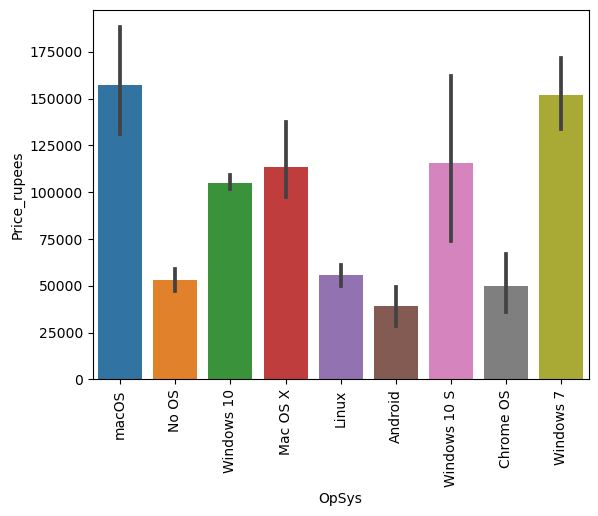

In [87]:
sns.barplot(x=df["OpSys"],y=df["Price_rupees"])
plt.xticks(rotation='vertical')
plt.show()

## ploting the graph that what is the weight of laptop corresponding to its price value 

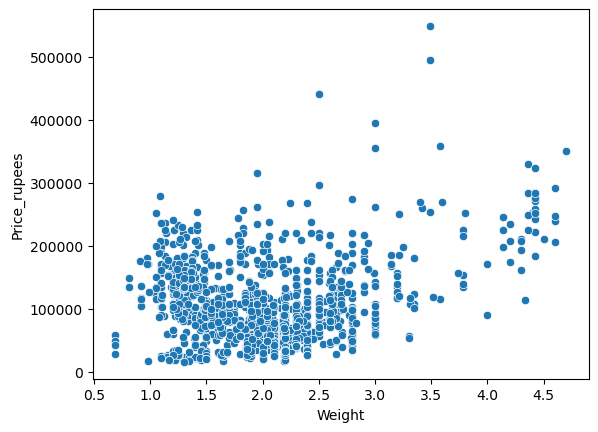

In [90]:
sns.scatterplot(x=df['Weight'],y=df["Price_rupees"]);

# conclusion:
## the analysis of laptop sales reveals key trends: dominance of top brands, diverse OS preferences, and the balance between price and performance. Stakeholders can leverage these insights to adapt strategies and meet evolving consumer demands. Continuous monitoring will be crucial for staying competitive in the dynamic laptop market